In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


2025-06-25 10:46:00.869365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750848361.133216      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750848361.222616      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-25 10:46:23.745257: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_split=0.1,
                    callbacks=[early_stop])


Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.7416 - loss: 0.7080 - val_accuracy: 0.8645 - val_loss: 0.3612
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8701 - loss: 0.3579 - val_accuracy: 0.8848 - val_loss: 0.3043
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8921 - loss: 0.3012 - val_accuracy: 0.8957 - val_loss: 0.2843
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9014 - loss: 0.2701 - val_accuracy: 0.9057 - val_loss: 0.2596
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9117 - loss: 0.2393 - val_accuracy: 0.9130 - val_loss: 0.2415
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9183 - loss: 0.2202 - val_accuracy: 0.9075 - val_loss: 0.2632
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9260 - loss: 0.1982 - val_accuracy: 0.9128 - val_loss: 0.2426


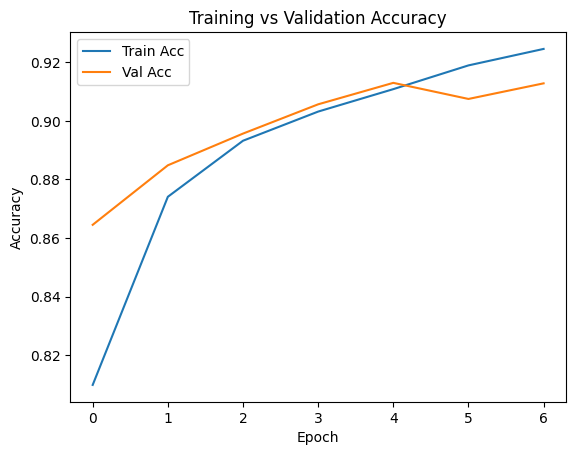

In [4]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9048 - loss: 0.2606
Test Accuracy: 0.9047999978065491


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


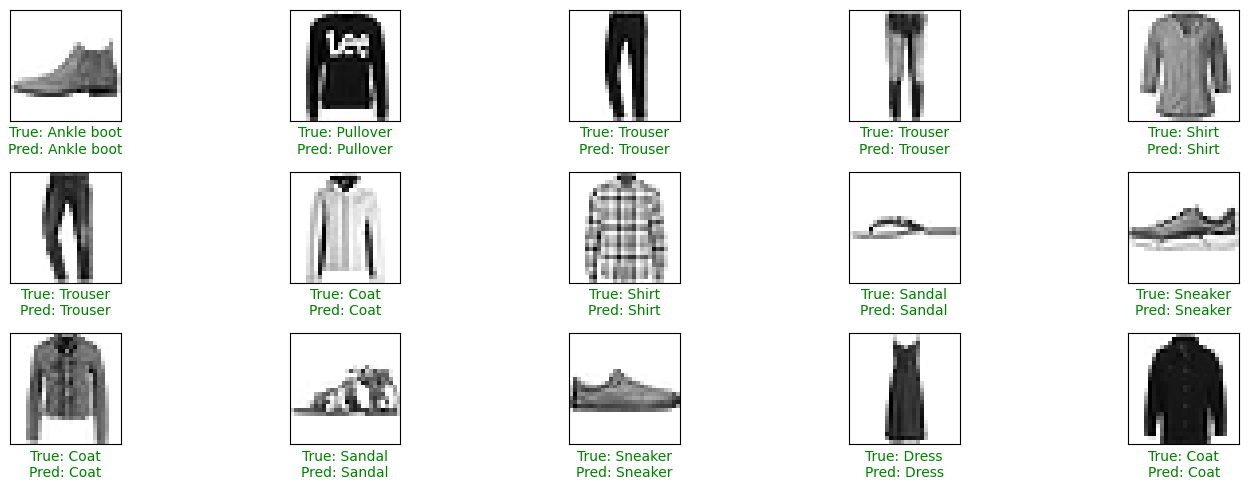

In [6]:
import numpy as np

# Predict class probabilities
pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(pred_probs, axis=1)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

import matplotlib.pyplot as plt

# Plot first 15 test images with predictions
num_images = 15
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    
    true_label = class_names[y_test[i]]
    pred_label = class_names[y_pred[i]]
    color = 'green' if y_test[i] == y_pred[i] else 'red'
    
    plt.xlabel(f"True: {true_label}\nPred: {pred_label}", color=color)
plt.tight_layout()
plt.show()
